part a :


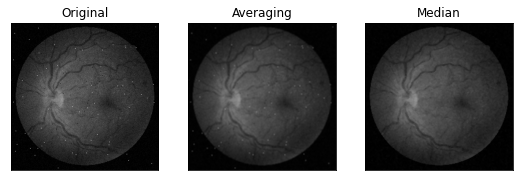

part c :


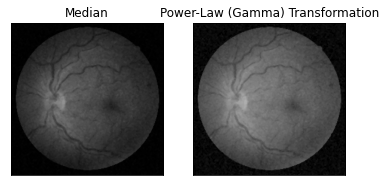

part d :


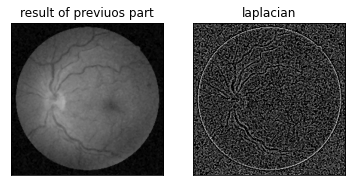

'\nimg_array = []\nfor i in np.arange(-2,2,0.01):\n    img = result.astype(np.float32) + i*laplacian.astype(np.float32)\n    height, width, layers = img.shape\n    size = (width,height)\n    img_array.append(img)\n    cv2.imwrite(\'/content/drive/MyDrive/img/%f.jpg\'%i , img)\n\n\nimage_folder = \'/content/drive/MyDrive/img\'\nvideo_name = \'/content/drive/MyDrive/Colab Notebooks/video/video.avi\'\n\nimages = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]\nframe = cv2.imread(os.path.join(image_folder, images[0]))\nheight, width, layers = frame.shape\n\nvideo = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*\'DIVX\'), 15, (width,height))\n\nfor image in images:\n    video.write(cv2.imread(os.path.join(image_folder, image)).astype(np.uint8))\n\ncv2.destroyAllWindows()\nvideo.release()'

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

img = cv2.imread('retina.jpg')

# a ) ------------------------------------------------------------------------
print('part a :')
kernel = np.ones((3,3),np.float32)/9
Averaging = cv2.filter2D(img,-1,kernel)
median = cv2.medianBlur(img,3)

plt.figure(figsize=(9,3))
plt.subplot(131),plt.imshow(img, vmin = 0 , vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(Averaging, vmin = 0 , vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(median, vmin = 0 , vmax = 255),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()


# b ) ------------------------------------------------------------------------

def transform(img, gamma):
  result = np.zeros(img.shape)
    
  if(len(img.shape) == 2):
    a = img[0][0].dtype               
  else:
    a = img[0][0][0].dtype
    
  result =  np.array(255*(img / 255) ** gamma) 

  return result.astype(a)

# c ) ------------------------------------------------------------------------

print('part c :')
gamma = 2/3
plt.figure()
result = transform(median,gamma)
plt.subplot(121),plt.imshow(median, vmin = 0 , vmax = 255),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result, vmin = 0 , vmax = 255),plt.title('Power-Law (Gamma) Transformation')
plt.xticks([]), plt.yticks([])
plt.show()


# d ) ------------------------------------------------------------------------
print('part d :')
kernel2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
laplacian = cv2.filter2D(result,-1,kernel2)
plt.figure()
plt.subplot(121),plt.imshow(result, vmin = 0 , vmax = 255),plt.title('result of previuos part')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(transform(laplacian,1/3), vmin = 0 , vmax = 255),plt.title('laplacian')
plt.xticks([]), plt.yticks([])
plt.show()

# e ) ------------------------------------------------------------------------


img_array = []
for i in np.arange(-2,2,0.01):
    img = result.astype(np.float32) + i*laplacian.astype(np.float32)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    cv2.imwrite('/content/drive/MyDrive/img/%f.jpg'%i , img)


image_folder = '/content/drive/MyDrive/img'
video_name = '/content/drive/MyDrive/Colab Notebooks/video/video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 15, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)).astype(np.uint8))

cv2.destroyAllWindows()
video.release()

In [3]:
img.max()

255

In [4]:
Averaging.max()

148

In [5]:
median.max()

148